# Kansas City's Housing


In [1]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

### The dataset, sourced from Kaggle and titled KC_House_Data, offers insights into housing trends within Kansas City. It encompasses various attributes such as location, construction area, interior features, and more, shedding light on the basic patterns in house pricing. Despite the multitude of columns in this dataset, my attention is directed towards three key factors: square footage of living space, number of bathrooms, and number of bedrooms. These variables are of particular interest as they are commonly perceived as significant determinants of a house's value. By conducting an analysis focusing on these factors, primarily employing linear regression techniques, I aim to discern how variations in square footage, bathroom count, and bedroom count influence the selling price of houses in Kansas.

### Through this analysis, I endeavor to uncover the extent to which these factors contribute to the pricing dynamics of houses in the Kansas real estate market. By leveraging linear regression, a widely-used statistical method for modeling relationships between variables, I seek to provide valuable insights that can inform decisions related to real estate investments, pricing strategies, and market trends in Kansas City.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
# Load and read the dataset
kc = pd.read_csv('kc_final.csv')
print(kc.head())

   Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  2014-10-13  221900.0         3       1.00   
1           1  6414100192  2014-12-09  538000.0         3       2.25   
2           2  5631500400  2015-02-25  180000.0         2       1.00   
3           3  2487200875  2014-12-09  604000.0         4       3.00   
4           4  1954400510  2015-02-18  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122

# Data Cleaning

### First, I am going to cleaning the dataset and get rid of all the unnecessary information. It is important because it makes sure the data is accurate and reliable, avoiding mistakes and misleading results in analysis.

In [4]:
kc.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
kc.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
kc.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data = kc.drop_duplicates()

In [8]:
data.shape

(21613, 22)

### With this plethora of columns available, my focus remains solely on price, bedrooms, bathrooms, and square footage of living space.

# EDA/ Correlation

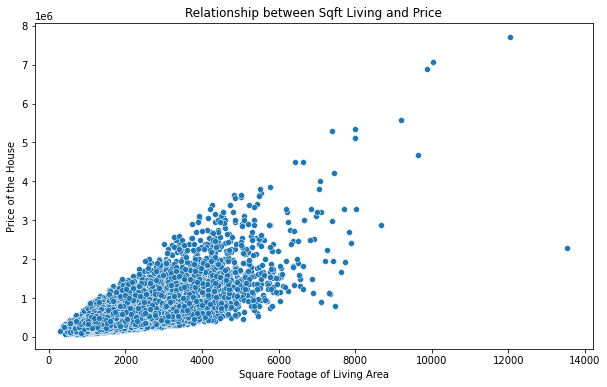

In [9]:
# Scatter plot to visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sqft_living', y='price')
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price of the House')
plt.show()

In [10]:
corr, _ = pearsonr(data['sqft_living'], data['price'])
print(f"The Pearson correlation coefficient between price and sqft_living is: {corr}")

The Pearson correlation coefficient between price and sqft_living is: 0.7020350546118


### The Pearson correlation coefficient value of 0.7020350546118 between price and sqft_living indicates a moderately strong positive correlation. This suggests that there is a tendency for higher house prices to be associated with larger square footage of living space. However, it's important to note that correlation does not imply causation, and other factors may also influence house prices.

In [11]:
# Linear regression using statsmodels
X = data['sqft_living']
y = data['price']
X = sm.add_constant(X)  # adding a constant for the intercept

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [12]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:10:05   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

### An R-squared value of 0.493 suggests that approximately 49.3% of the variability in the dependent variable (price) can be explained by the independent variable (sqft_living) in the linear regression model. While an R-squared value of 0.493 indicates a moderate level of explanatory power, whether it constitutes a "good fit" depends on the context and specific requirements of the analysis. In some cases, an R-squared value of 0.493 might be considered satisfactory.

### The F-statistic of 2.100e+04, indicating a high value, suggests that the regression model is statistically significant. 

### In summary, while an R-squared value of 0.493 and a significant F-statistic suggest that the model has some explanatory power and statistical significance. This model can be consider a "good fit."

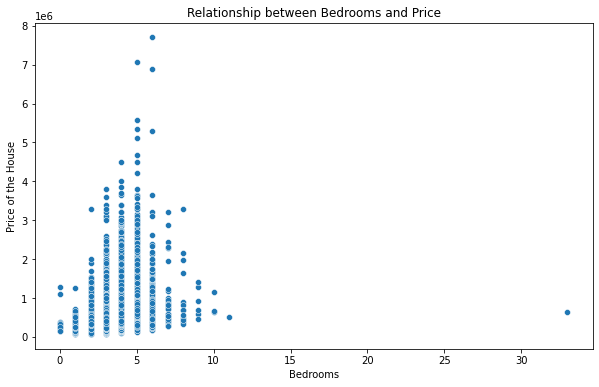

In [13]:
# Scatter plot to visualize the relationship between bedrooms and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bedrooms', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price of the House')
plt.show()

In [14]:
corr, _ = pearsonr(data['bedrooms'], data['price'])
print(f"The Pearson correlation coefficient between price and sqft_living is: {corr}")

The Pearson correlation coefficient between price and sqft_living is: 0.3083495981456383


### The Pearson correlation coefficient value of 0.3083495981456383 between price and bedrooms indicates a moderately weak positive correlation. This suggests that there is some tendency for higher house prices to be associated with larger baedrooms, but the relationship is not very strong..

In [15]:
# Linear regression using statsmodels
X1 = data['bedrooms']
y1 = data['price']
X1 = sm.add_constant(X)  # adding a constant for the intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:10:05   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### An R-squared value of 0.095 indicates that approximately 9.5% of the variability in the dependent variable (price) can be explained by the independent variable (bedrooms) in the linear regression model. This suggests that the model has a relatively weak explanatory power, as it can only account for a small proportion of the variance in house prices using the square footage of living space as a predictor.

### The F-statistic value of 2271 represents the ratio of the mean square of the regression (explained variance) to the mean square of the residuals (unexplained variance). This shows a high F-statistic indicates that the regression model is statistically significant.

### In summary, while the F-statistic suggests that the regression model is statistically significant, the low R-squared value indicates that the model has limited predictive power in explaining the variability in house prices using only the bedrooms. 

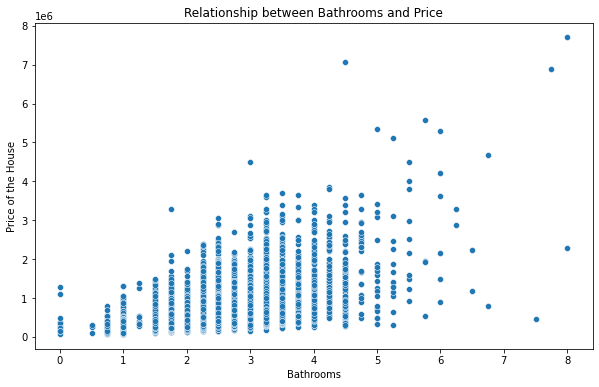

In [16]:
# Scatter plot to visualize the relationship between bedrooms and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bathrooms', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price of the House')
plt.show()

In [17]:
corr, _ = pearsonr(data['bathrooms'], data['price'])
print(f"The Pearson correlation coefficient between price and sqft_living is: {corr}")

The Pearson correlation coefficient between price and sqft_living is: 0.5251375054139619


### The Pearson correlation coefficient value of 0.5251375054139619 between price and bathrooms indicates a moderately strong positive correlation. This suggests that there is a noticeable tendency for higher house prices to be associated with bathrooms. However, it's important to remember that correlation does not imply causation, and other factors may also influence house prices.

In [18]:
# Linear regression using statsmodels
X2 = data['bathrooms']
y2 = data['price']
X2 = sm.add_constant(X)  # adding a constant for the intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:10:05   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### Similar to sqft_living, bathrooms' R-squared of 0.276 can be consider a moderate level and the F-statistic of 8229, indicating a high value, suggests that the regression model is statistically significant. In summary, the relatively high R-squared value and significant F-statistic suggest that the regression model is statistically significant and has a moderate ability to explain the variability in house prices using bathrooms.

### Based on the regression, it reveals a robust association between square footage of living space and the number of bathrooms with the price of a house.

# Scalling and Splitting

### Now I am going to scale data to ensures that features are normalized to a consistent range, essential for algorithms sensitive to varying feature scales. Splitting data into training and testing sets enables the evaluation of model performance on unseen data, guarding against overfitting and assessing the model's generalization capability

In [19]:
X = data[['bedrooms','bathrooms','sqft_living']].values 
y = data['price'].values 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

### In our analysis, we are calculating the mean and standard deviation values from the training data (td) and using these statistics to fit a model (mean, sd). Once the model is fitted with these parameters, we proceed to transform the training data to standardize it, making sure it conforms to a predefined scale based on the computed mean and standard deviation. This transformation helps in normalizing the data, making it easier to apply machine learning algorithms effectively. After transforming the training data, we apply the same transformation to the test data. This ensures that both datasets are scaled similarly, providing a fair basis for evaluating the model's performance when predicting new, unseen data.

In [21]:
scaler = StandardScaler()

scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
coeff_df = pd.DataFrame(regressor.coef_,['bedrooms','bathrooms','sqft_living'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 674542.56351562,  407134.4470647 ,  660211.68384266, ...,
        620913.85491059,  371790.91568019, 1330025.18257742])

In [25]:
coeff_df

,Coefficient
bedrooms,-51426.592086
bathrooms,8356.951714
sqft_living,279036.117830


# Conculsion

### Upon analysis of the table, it becomes apparent that among the three variables under consideration, sqft_living demonstrates the strongest correlation with price. This finding implies that fluctuations in the square footage of living areas are closely linked to shifts in house prices, indicating that larger living spaces tend to command higher prices. Following sqft_living, bathrooms emerge as the next most influential factor. Interestingly, bedrooms do not exhibit a significant positive correlation with price, as evidenced by their correlation coefficient falling within the negative range. This suggests that the number of bedrooms may not have a substantial impact on house prices in this dataset, highlighting the importance of considering multiple factors when evaluating housing trends and pricing dynamics.

### By identifying the relative strengths of correlation between these variables and house prices, stakeholders can gain valuable insights into the key determinants driving housing market trends and make more informed decisions regarding property investments, pricing strategies, and market positioning. Additionally, this analysis underscores the significance of thorough data examination in understanding the complex interplay between different variables and their impact on real estate valuations.

### In the future, as I allocate more time, I aspire to conduct a comprehensive analysis encompassing all variables. My aim is to explore potential additional factors that could influence house prices, thereby gaining a deeper understanding of the complex dynamics shaping the real estate market.